In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
from os.path import isfile,join
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [3]:
def get_url_resp(country="Worldwide"):
    base_url = "https://www.worldometers.info/coronavirus/"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:74.0) Gecko/20100101 Firefox/74.0"}
    if country =="Worldwide":
        url = base_url
    else:
        url =base_url+"country/"+country+"/"
    response = requests.get(url, headers = headers)
    html = response.text
    return BeautifulSoup(html,"html.parser")

def format_case_numbers(soup,country="Worldwide"):
    if country == "Worldwide":
        soup_selector = soup.select(".col-md-6")
        val = [soup_selector[2].find_all(type="text/javascript")[0],soup_selector[3].find_all(type="text/javascript")[0]]
    else:
        soup_selector = soup.find_all("script")
        new_soup =[]
        for i in range(len(soup_selector)):
            if 'categories' in str(soup_selector[i]):
                new_soup.append(soup_selector[i])
        val = new_soup#[:2]
    return val

def get_right_element(val,Status = "Cases"):
    string1 = f"'Total Coronavirus {Status}'"
    new_soup =[]
    for i in range(len(val)):
        if string1 in str(val[i]):
            new_soup.append(val[i])
    return new_soup

def get_both_elements(val):#,country="Worldwide"):
    # if country=="Worldwide":
    #     return val
    # else:
    statuses_tuple = ("Cases","Deaths")
    new_soup = []
    for sta in statuses_tuple:
        new_soup.append(get_right_element(val,sta))
    return new_soup

def get_case_numbers_from_soup(val):#,country="Worldwide",status="Cases"):
    #dates = val.get_text().rsplit("categories",1)[1].split("[")[1].split("]")[0]
    dates = val.get_text().rsplit("categories")[1].split("[")[1].split("]")[0]
    case_num = val.get_text().rsplit("data")[1].split("[")[1].split("]")[0]
    case_num_formatted=case_num.split(',')
    dates_formatted=dates.split(',')
    case_num_lst=[]
    date_lst = []
    # for lst in case_num_lst,date_lst:
    #     lst.append(country)
    #     lst.append(status)

    for i in range(len(case_num_formatted)):
        if case_num_formatted[i] == "null":
            case_num_input = 0
        else:
            case_num_input = int(case_num_formatted[i])
        case_num_lst.append(case_num_input)

    for i in dates_formatted:
        date_lst.append(i.replace('"',''))
    return zip(date_lst,case_num_lst)

def get_case_dictionary(country="Worldwide"):#,status="Cases"):
    soup = get_url_resp(country)
    new_soup1 = format_case_numbers(soup,country)
    val = get_both_elements(new_soup1)
    statuses_tuple = ("Cases","Deaths")
    statuses = {
        "Cases":0,
        "Deaths":1,
    }
    lst=[]
    for sta in statuses_tuple:
        lst.append(dict(get_case_numbers_from_soup(val[statuses[sta]][0])))
    return lst
    #return dict(get_case_numbers_from_soup(val[statuses[status]]))#,country,status)
    # return get_case_numbers_from_soup(val[statuses[status]],country,status)


In [4]:
Countries = ("Worldwide","China","US","Italy","Spain","Germany","France","UK","India","South-Korea","Iran","Netherlands","Belgium","Switzerland","Turkey","Sweden","Indonesia","Portugal")
statuses_tuple = ("Cases","Deaths")
lst=[[],[]]
for country in Countries:
    for sta in statuses_tuple:
        lst[0].append(country)
        lst[1].append(sta)
### WORKS TO HERE ###
# lst = [["Worldwide","US"],["Cases","Cases"]]

data=[]
for country in Countries:
    country_data=get_case_dictionary(country=country)
    data.extend(country_data)

In [5]:
tuples = list(zip(*lst))
index = pd.MultiIndex.from_tuples(tuples)
cols = list(data[0].keys())

In [14]:
df = pd.DataFrame(data=data,index=index,dtype=pd.Int64Dtype())
df

Jan 22  Jan 23  Jan 24  Jan 25  Jan 26  Jan 27  Jan 28  \
Worldwide   Cases      580     845    1317    2015    2800    4581    6058   
            Deaths      17      25      41      56      80     106     132   
China       Cases      571     830    1287    1975    2744    4515    5974   
            Deaths      17      25      41      56      80     106     132   
US          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Italy       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Spain       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Germany     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
France      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
UK          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
India       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
South-Korea Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Iran        Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Netherlands Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Belgium     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Switzerland Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Turkey      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Sweden      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Indonesia   Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Portugal    Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   

                    Jan 29  Jan 30  Jan 31  ...  Mar 31  Apr 01   Apr 02  \
Worldwide   Cases     7813    9823   11950  ...  859620  936637  1016734   
            Deaths     170     213     259  ...   42313   47203    53182   
China       Cases     7711    9692   11791  ...   81554   81589    81620   
            Deaths     170     213     259  ...    3312    3318     3322   
US          Cases     <NA>    <NA>    <NA>  ...  189789  216408   246515   
            Deaths    <NA>    <NA>    <NA>  ...    4057    5107     6081   
Italy       Cases     <NA>    <NA>    <NA>  ...  105792  110574   115242   
            Deaths    <NA>    <NA>    <NA>  ...   12428   13155    13915   
Spain       Cases     <NA>    <NA>    <NA>  ...   95923  104118   112065   
            Deaths    <NA>    <NA>    <NA>  ...    8464    9387    10348   
Germany     Cases     <NA>    <NA>    <NA>  ...   71808   77981    84794   
            Deaths    <NA>    <NA>    <NA>  ...     775     931     1107   
France      Cases     <NA>    <NA>    <NA>  ...   52128   56989    59105   
            Deaths    <NA>    <NA>    <NA>  ...    3523    4032     5

In [15]:
df.xs('Deaths',level=1)

,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31,...,Mar 31,Apr 01,Apr 02,Apr 03,Apr 04,Apr 05,Apr 06,Apr 07,Apr 08,Apr 09
Worldwide,17,25,41,56,80,106,132,170,213,259,...,42313,47203,53182,58897,64696,69433,74663,82046,88460,95693
China,17,25,41,56,80,106,132,170,213,259,...,3312,3318,3322,3326,3329,3331,3331,3333,3335,3336
US,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,4057,5107,6081,7127,8457,9622,10880,12851,14791,16691
Italy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279
Spain,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447
Germany,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,775,931,1107,1275,1444,1584,1810,2016,2349,2607
France,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210
UK,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,1789,2352,2921,3605,4313,4934,5373,6159,7097,7978
India,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,35,58,72,86,99,118,136,160,178,227
South-Korea,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,162,165,169,174,177,183,186,192,200,204


In [16]:
df.xs('Deaths',level=1)[df.columns[-14:]]

,Mar 27,Mar 28,Mar 29,Mar 30,Mar 31,Apr 01,Apr 02,Apr 03,Apr 04,Apr 05,Apr 06,Apr 07,Apr 08,Apr 09
Worldwide,27345,30863,34067,37776,42313,47203,53182,58897,64696,69433,74663,82046,88460,95693
China,3295,3300,3300,3305,3312,3318,3322,3326,3329,3331,3331,3333,3335,3336
US,1697,2222,2585,3143,4057,5107,6081,7127,8457,9622,10880,12851,14791,16691
Italy,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279
Spain,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447
Germany,351,433,541,645,775,931,1107,1275,1444,1584,1810,2016,2349,2607
France,1995,2314,2606,3024,3523,4032,5387,6507,7560,8078,8911,10328,10869,12210
UK,759,1019,1228,1408,1789,2352,2921,3605,4313,4934,5373,6159,7097,7978
India,20,24,27,32,35,58,72,86,99,118,136,160,178,227
South-Korea,139,144,152,158,162,165,169,174,177,183,186,192,200,204


In [23]:
def squeeze_nan(x, hold):
    if x.name not in hold:
        original_columns = x.index.tolist()

        squeezed = x.dropna()
        squeezed.index = [original_columns[n] for n in range(squeezed.count())]

        return squeezed.reindex(original_columns, fill_value=np.nan)
    else:
        return x

filter_num = 5000
filter_cases='Deaths'
start_num =300

df1 = df.xs(filter_cases,level = 1).fillna(0)
df2 = df1[df1>start_num]
df3 = df2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df3.columns=[f"Day {day+1}" for day in range(len(df3.columns.values.tolist()))]
keep_cols = df3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df3[df3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df4_1 = df3[df3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df4 = df4_1.sort_values(by=df4_1.columns.values.tolist()[::-1],ascending=True)
df4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33
Italy,366,463,631,827,1016,1266,1441,1809,2158,2503,...,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279
Spain,342,533,638,831,1093,1381,1772,2311,2991,3647,...,14792,15447,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,372,450,562,674,860,1100,1331,1696,1995,2314,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
US,301,414,556,781,1028,1296,1697,2222,2585,3143,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,335,422,463,578,759,1019,1228,1408,1789,2352,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


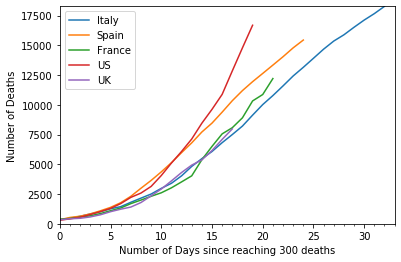

In [24]:
for country in df4.T.columns.values.tolist():
    line = df4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))

In [25]:
filename_h="hourly cases.csv"
df_head_h=pd.read_csv(filename_h,nrows=0)
df_head_lst_h = list(df_head_h)[2:]
data_types_h = {val:pd.Int64Dtype() for val in df_head_lst_h}

month_dict ={3:"Mar",4:"Apr"}

df_h = pd.read_csv(filename_h,index_col=[0,1],dtype=data_types_h).drop('Recovered',level=1).iloc[:,-1]
todays_date = month_dict[datetime.datetime.utcnow().month]+" "+str(datetime.datetime.utcnow().day)
df_h.name = todays_date
df_h

Belgium      Cases       26667
             Deaths       3019
China        Cases       81907
             Deaths       3336
France       Cases      124869
             Deaths      13197
Germany      Cases      122171
             Deaths       2767
India        Cases        7598
             Deaths        246
Indonesia    Cases        3512
             Deaths        306
Iran         Cases       68192
             Deaths       4232
Italy        Cases      147577
             Deaths      18849
Netherlands  Cases       23097
             Deaths       2511
Portugal     Cases       15472
             Deaths        435
South-Korea  Cases       10450
             Deaths        208
Spain        Cases      158273
             Deaths      16081
Sweden       Cases        9685
             Deaths        870
Switzerland  Cases       24551
             Deaths       1002
Turkey       Cases       47029
             Deaths       1006
UK           Cases       73758
             Deaths       8958
US      

In [39]:
#attach latest hourly update to the end
df_copy = df.copy()

filter_num = 5000
filter_cases='Deaths'
start_num =5000

if todays_date in df_copy.columns.values.tolist():
    df_copy0 = df_copy
else:
    df_copy0 = df_copy.join(df_h,how='outer')
df_copy1 = df_copy0.xs(filter_cases,level = 1).fillna(0)
df_copy2 = df_copy1[df_copy1>start_num]
df_copy3 = df_copy2.apply(lambda x: squeeze_nan(x, ['B']), axis=1).drop('Worldwide')
df_copy3.columns=[f"Day {day+1}" for day in range(len(df_copy3.columns.values.tolist()))]
keep_cols = df_copy3.drop("China").dropna(how='all',axis=1).columns.values.tolist()
keep_indices = df_copy3[df_copy3>filter_num].dropna(how='all').index.values.tolist()
days = len(keep_cols)
# keep_indices = Countries
# keep_indices = ('Italy','Spain', 'France','US','UK')
all_indices = df_copy3.index.values.tolist() 
drop_indices = [val for val in all_indices if val not in keep_indices]
df_copy4_1 = df_copy3[df_copy3.columns[0:days]].drop(drop_indices).dropna(how='all').astype('Int64')
df_copy4 = df_copy4_1.sort_values(by=df_copy4_1.columns.values.tolist()[::-1],ascending=True)
df_copy4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20
Italy,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849
Spain,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,<NA>,<NA>,<NA>,<NA>,<NA>
US,5107,6081,7127,8457,9622,10880,12851,14791,16691,18664,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,5387,6507,7560,8078,8911,10328,10869,12210,13197,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,5373,6159,7097,7978,8958,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


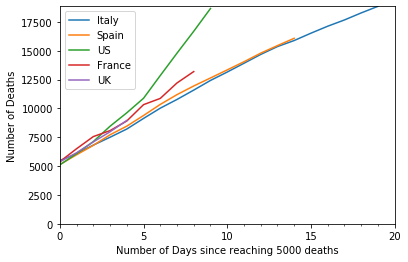

In [40]:
for country in df_copy4.T.columns.values.tolist():
    line = df_copy4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df_copy4.max())))
line.set_xlim((0,days))
line.set_ylabel(f'Number of {filter_cases}')
line.set_xlabel(f'Number of Days since reaching {start_num} {filter_cases.lower()}')
# line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))
line.set_yscale('log') # log graph change to 'linear' for linear graph

plt.savefig(join("Coronavirus Graphs",f'Cumulative {filter_cases.lower()} {start_num} showing {days} days'))